
# WeatherPY

## Analysis on WeatherPY
##### The plot on Latitude vs Temperature shows that the temperature is highest at the equator and lowest at the poles.
##### The humidity at the equator is in the range from 50%-100%. However, the trends does not change based on the latitude.
##### There seems to be no co-relation of cloudliness with respect to the latitude.
##### The windspeed for most cities fall under 20mph and there seems to be no trend on the windspeed with respect to the latitude.

In [1]:
# Import the Dependencies
import pandas as pd
import numpy as np

from os import path, makedirs # fetch path and makedirs function from os file

import random
import requests as req

import matplotlib.pyplot as plt

import config as config
from citipy import citipy
import openweathermapy as owm

#Gets the current date
import datetime
now = datetime.datetime.now()
now

datetime.datetime(2018, 6, 17, 14, 57, 18, 432143)

In [2]:
# Setting the units to imperial to get Fahrenheit reading
settings = {"units": "imperial", "appid": config.owm_key}
# config.owm_key

## Generate a List of Cities

In [3]:
#  The Latitudes range considered from Equator : -90 to 90 & Longitudes range considered from Primeredian: -180 to 180
latitude = list(np.arange(-90,90.01,0.01))
longitude = list(np.arange(-180,180.01,0.01))
# len(longitude)

In [4]:
# # Ramdomly generate co-ordinates by setting Latitude and Longitude.
latitude_samples=random.sample(latitude,3000)
longitude_samples=random.sample(longitude,3000)

In [5]:
# # Creating a dataframe from the random sample of Latitude and Longitude
cities_data = pd.DataFrame({"Latitude":latitude_samples,"Longitude":longitude_samples})
# cities_data

In [6]:
#Creating new columns City and Country for storing the details corresponding to the co-ordinates
cities_data["City"]=""
cities_data["Country"]=""

# Finding the city and the country code corresponding to the Latitude and Longitude
for index,row in cities_data.iterrows():
    city = citipy.nearest_city(row["Latitude"], row["Longitude"])
    cities_data.iat[index,2] =  city.city_name
    cities_data.iat[index,3] =  city.country_code
# cities_data

In [7]:
# Drop the Latitude and Longitude as the values of the nearest city and not the excat co-ordinates of the city
cities_found=cities_data.drop(cities_data.columns[[0, 1]], axis=1)
cities_found

unique_cities_data = cities_found 

# Deleting duplicate values from the list of cities and keeping only the first
unique_cities_data = unique_cities_data.drop_duplicates(['City'], keep='first')

unique_count = len(unique_cities_data)
if unique_count >1000:
    unique_cities_data = unique_cities_data.sample(n=1000)
else :
    unique_cities_data = unique_cities_data.sample(n=unique_count)
# Randomly sampling a list of 500 cities 

unique_cities_data = unique_cities_data.sample(n=1000)

# Resetting the index of the cities list
unique_cities_data = unique_cities_data.reset_index(drop=True)

#unique_cities_data

## Perform API Calls

In [8]:
# Get data for each city in unique_cities_data
weather_data_list_json = []

url="https://api.openweathermap.org/data/2.5/weather?appid=" + config.gkey + "&units=imperial&q="

print("\nBeginning Data Retrieval\n-----------------------------")

#Get the response from OpenWeatherMapY and storing the response into weather_data if response is found
for index,row in unique_cities_data.iterrows():  
    # print("\nProcessing record %s|%s,%s"%((index+1),row["City"],row["Country"]))
    # print("\n"+url+"%s,%s"%(row["City"].replace(" ","+"),row["Country"]))
    try:
        response = owm.get_current("%s,%s"%(row["City"],row["Country"]), **settings)
        # Appending the response to the weather_Data
        weather_data_list_json.append(response)
    except:
          print("\n" + row["City"] + " in " + row["Country"] + " is not found!!!... ")
         # print("\n\033[1;31m City not found. Skipping...\033[1;30m" + row["City"] + " not found "+ "in " + row["Country"])

print("\n-----------------------------\nWeather Data download Complete !!!\n-----------------------------")


Beginning Data Retrieval
-----------------------------

asau in tv is not found!!!... 

saleaula in ws is not found!!!... 

kapoeta in sd is not found!!!... 

rungata in ki is not found!!!... 

laguna in br is not found!!!... 

emba in kz is not found!!!... 

khani in ru is not found!!!... 

visimo-utkinsk in ru is not found!!!... 

san bartolome de tirajana in es is not found!!!... 

artyk in ru is not found!!!... 

taolanaro in mg is not found!!!... 

olafsvik in is is not found!!!... 

san quintin in mx is not found!!!... 

yirol in sd is not found!!!... 

kazalinsk in kz is not found!!!... 

payo in ph is not found!!!... 

humaita in br is not found!!!... 

krasnoselkup in ru is not found!!!... 

ituni in gy is not found!!!... 

linchuan in cn is not found!!!... 

el badari in eg is not found!!!... 

dolbeau in ca is not found!!!... 

balimo in pg is not found!!!... 

muzquiz in mx is not found!!!... 

ozgon in kg is not found!!!... 

abu samrah in qa is not found!!!... 

brasilei

In [9]:
# len(weather_data_list_json)
weather_data_list_json

[{'coord': {'lon': -109.46, 'lat': 49.91},
  'weather': [{'id': 801,
    'main': 'Clouds',
    'description': 'few clouds',
    'icon': '02d'}],
  'base': 'stations',
  'main': {'temp': 68.14,
   'pressure': 923.16,
   'humidity': 47,
   'temp_min': 68.14,
   'temp_max': 68.14,
   'sea_level': 1031.83,
   'grnd_level': 923.16},
  'wind': {'speed': 5.5, 'deg': 65.0005},
  'clouds': {'all': 24},
  'dt': 1529261840,
  'sys': {'message': 0.0099,
   'country': 'CA',
   'sunrise': 1529233712,
   'sunset': 1529292572},
  'id': 6065592,
  'name': 'Maple Creek',
  'cod': 200},
 {'coord': {'lon': 153.71, 'lat': 67.46},
  'weather': [{'id': 803,
    'main': 'Clouds',
    'description': 'broken clouds',
    'icon': '04d'}],
  'base': 'stations',
  'main': {'temp': 49.61,
   'pressure': 1012.16,
   'humidity': 84,
   'temp_min': 49.61,
   'temp_max': 49.61,
   'sea_level': 1022.11,
   'grnd_level': 1012.16},
  'wind': {'speed': 3.71, 'deg': 18.0005},
  'clouds': {'all': 80},
  'dt': 1529261840,
  '

In [10]:
# Create an "extracts" object to get the various parameter required to form the weather data table
weather_data_df = ["name","sys.country","dt","coord.lat", "coord.lon","main.temp_max","main.humidity","wind.speed","clouds.all"]

# Create a Pandas DataFrame with the results
data = [response(*weather_data_df) for response in weather_data_list_json]
column_names = ["City","Country","Date","Latitude", "Longitude","Temperature","Humidity","Wind speed","Cloudliness"]
weather_data_df = pd.DataFrame(data, columns=column_names)

weather_data_df.head()

,City,Country,Date,Latitude,Longitude,Temperature,Humidity,Wind speed,Cloudliness
0,Maple Creek,CA,1529261840,49.91,-109.46,68.14,47,5.50,24
1,Srednekolymsk,RU,1529261840,67.46,153.71,49.61,84,3.71,80
2,Ossora,RU,1529261840,59.24,163.07,40.88,90,3.71,0
3,Sangar,RU,1529261841,63.92,127.47,47.98,64,2.26,12
4,Asbe Teferi,ET,1529261841,9.08,40.87,60.41,81,2.59,0


In [13]:
#Check if output folder exist, create if not exists!
filePath = 'Output'
if not path.exists(filePath):
    makedirs(filePath)
    
# Save the result to a csv file

weather_data_df.to_csv("Output/Weather_Data.csv")

# Count of the data in the dataframe
weather_data_df.count()

weather_data_500_Cities = weather_data_df.head(500)

In [18]:
# Creating a function to set the properties of the graph
def plot_graph(x_label,y_label,x_limits,save_file_name):
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xlim(x_limits)
    plt.title("%s vs %s (%s/%s/%s)"%(x_label,y_label,now.month,now.day,now.year),fontsize=14)
    plt.grid(True)
    plt.savefig(save_file_name)
    plt.show()

## Latitude vs Temperature Plot

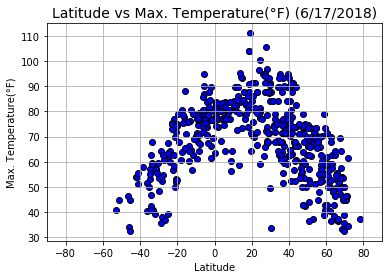

In [23]:
# Latitude vs Max. Temperature(F)
plt.scatter(x=weather_data_500_Cities["Latitude"],y=weather_data_500_Cities["Temperature"],facecolors="blue",edgecolors="black")
plot_graph("Latitude","Max. Temperature(°F)",[-90,90],"Output/City Latitude vs Temperature.png")

## Latitude vs. Humidity Plot


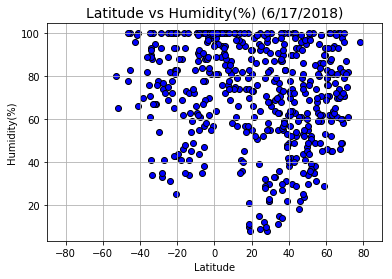

In [24]:
# # Latitude vs Humidity in % 
plt.scatter(x=weather_data_500_Cities["Latitude"],y=weather_data_500_Cities["Humidity"],facecolors="blue",edgecolors="black")
plot_graph("Latitude","Humidity(%)",[-90,90],"Output/City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

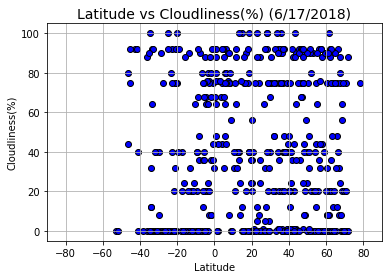

In [25]:
# Latitude vs Cloudliness in %
plt.scatter(x=weather_data_500_Cities["Latitude"],y=weather_data_500_Cities["Cloudliness"],facecolors="blue",edgecolors="black")
plot_graph("Latitude","Cloudliness(%)",[-90,90],"Output/City Latitude vs Cloudliness.png")

## Latitude vs. Wind Speed Plot

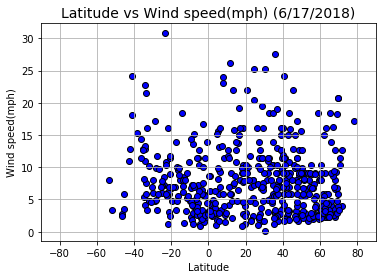

In [26]:
# Latitude vs Wind Speed in (mph)
plt.scatter(x=weather_data_500_Cities["Latitude"],y=weather_data_500_Cities["Wind speed"],facecolors="blue",edgecolors="black")
plot_graph("Latitude","Wind speed(mph)",[-90,90],"Output/City Latitude vs Wind speed.png")